# Seol Bike Rental Prediction 


# Preliminary Wrangling

This document explores a dataset containing first 20 days of each month. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
bikes = pd.read_csv('tttest.csv', parse_dates=[1], dayfirst=True)

In [4]:
bikes['year'] = pd.to_datetime(bikes.Date).dt.year
bikes['month'] = pd.to_datetime(bikes.Date).dt.month
bikes['day'] = pd.to_datetime(bikes.Date).dt.day
bikes['time'] = pd.to_datetime(bikes[['year', 'month', 'day', 'Hour']])
bikes = bikes.set_index('time')
bikes.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [6]:
bikes.loc['2018-02-25']

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
time,,,,,,,,,,,,,,,
2018-02-25 00:00:00,6384,2018-02-25,182,0,-1.1,44,1.2,1741,-11.8,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 01:00:00,6385,2018-02-25,189,1,-1.4,43,0.6,1791,-12.3,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 02:00:00,6386,2018-02-25,124,2,-1.5,46,1.1,1744,-11.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 03:00:00,6387,2018-02-25,103,3,-1.3,42,0.8,1648,-12.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 04:00:00,6388,2018-02-25,52,4,-1.1,43,0.7,1558,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 05:00:00,6389,2018-02-25,37,5,-0.7,41,0.9,1442,-12.3,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 06:00:00,6390,2018-02-25,54,6,-0.8,44,0.6,1541,-11.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 07:00:00,6391,2018-02-25,77,7,-1.0,47,0.9,1552,-10.9,0.00,0.0,0.0,Winter,No Holiday,Yes
2018-02-25 08:00:00,6392,2018-02-25,158,8,-1.3,54,0.6,1597,-9.4,0.06,0.0,0.0,Winter,No Holiday,Yes


In [27]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)

(3000, 15)
ID                                    int64
Date                         datetime64[ns]
y                                     int64
Hour                                  int64
Temperature(�C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(�C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object


In [28]:
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000 entries, 2017-12-21 00:00:00 to 2018-11-30 23:00:00
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         3000 non-null   int64         
 1   Date                       3000 non-null   datetime64[ns]
 2   y                          3000 non-null   int64         
 3   Hour                       3000 non-null   int64         
 4   Temperature(�C)            3000 non-null   float64       
 5   Humidity(%)                3000 non-null   int64         
 6   Wind speed (m/s)           3000 non-null   float64       
 7   Visibility (10m)           3000 non-null   int64         
 8   Dew point temperature(�C)  3000 non-null   float64       
 9   Solar Radiation (MJ/m2)    3000 non-null   float64       
 10  Rainfall(mm)               3000 non-null   float64       
 11  Snowfall (cm)              3000 n

In [29]:
bikes.head(5)

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
time,,,,,,,,,,,,,,,
2017-12-21 00:00:00,5760,2017-12-21,166,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
2017-12-21 01:00:00,5761,2017-12-21,189,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2017-12-21 02:00:00,5762,2017-12-21,132,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
2017-12-21 03:00:00,5763,2017-12-21,79,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
2017-12-21 04:00:00,5764,2017-12-21,58,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


In [30]:
# descriptive statistics for numeric variables
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,7259.500000,866.169729,5760.0,6509.75,7259.50,8009.25,8759.00
y,3000.0,706.749000,624.944351,0.0,199.00,544.00,1062.00,3418.00
Hour,3000.0,11.500000,6.923341,0.0,5.75,11.50,17.25,23.00
Temperature(�C),3000.0,13.035300,12.026752,-17.8,3.90,13.95,22.90,38.00
Humidity(%),3000.0,57.966000,21.330288,0.0,40.00,58.00,76.00,98.00
Wind speed (m/s),3000.0,1.727933,1.013826,0.0,0.90,1.50,2.40,6.90
Visibility (10m),3000.0,1366.005333,643.374688,33.0,779.00,1591.50,2000.00,2000.00
Dew point temperature(�C),3000.0,4.103667,13.170840,-30.6,-3.90,4.90,15.60,26.80
Solar Radiation (MJ/m2),3000.0,0.562940,0.866555,0.0,0.00,0.01,0.91,3.52
Rainfall(mm),3000.0,0.174733,1.223086,0.0,0.00,0.00,0.00,29.50


In [31]:
bikes.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [32]:
#renaming coulumns:
features = ['ID','date' ,'y', 'hour', 'temperature', 'humidity',
            'wind_speed', 'visibility', 'dew_point_temp',
            'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day']
bikes.columns = features
bikes.head(1)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
time,,,,,,,,,,,,,,,
2017-12-21,5760,2017-12-21,166,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes


In [33]:
# order seasons column:
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ["Winter", "Spring", "Summer", "Autumn" ])
bikes['seasons'] = bikes['seasons'].astype(ordered)

In [34]:
#Extract day of year:
bikes['year_day'] = pd.to_datetime(bikes.date).dt.dayofyear
bikes['weekday'] = pd.to_datetime(bikes.date).dt.weekday
bikes['month'] = pd.to_datetime(bikes.date).dt.month

In [35]:
bikes.head(1)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year_day,weekday,month
time,,,,,,,,,,,,,,,,,,
2017-12-21,5760,2017-12-21,166,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes,355,3,12


### What is the structure of the dataset?

There are 5760 row in the dataset represents the number of bikes rented at each hour in the first 20 days of each month with 15 features (ID, Date, y(number of bikes), Hour, Temperature(C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday and Functioning Day). Most variables are numeric in nature, but the variables Seasons, Holiday, and Functioning Day are factor variables.


### What is/are the main feature(s) of interest in the dataset?

I'm most interested in figuring out what features are best for predicting the number of rented bikes of each hour in the remaining 10 days in the test dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Hour variable will have the strongest effect on number of bikes rented. I also think that the Seasons, Holiday, and Functioning Day will have effects also.Temperature, Snowfall to have a much smaller degree than the main effect of Hour variable.



# Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: y(number of bikes).

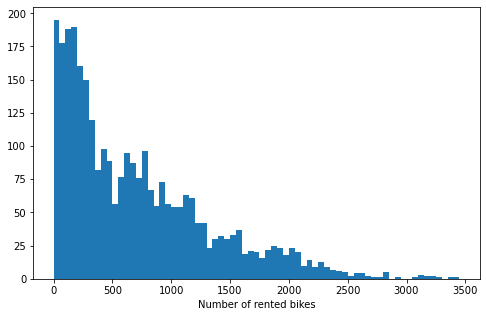

In [36]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, bikes['y'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'y', bins = bins)
plt.xlabel('Number of rented bikes')
plt.show()

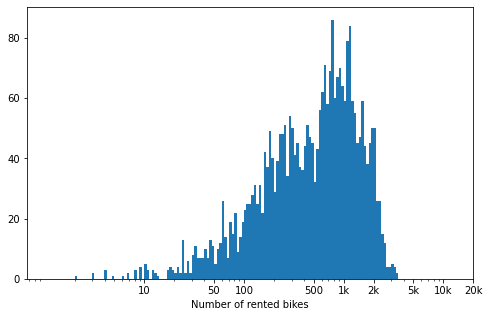

In [37]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(bikes['y'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'y', bins = bins)
plt.xscale('log')
plt.xticks([10,50, 100 ,500, 1e3, 2e3, 5e3, 1e4, 2e4], [10,50, 100, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Number of rented bikes')
plt.show()

y(Number of bikes) has a long-tailed distribution, with a lot of hours with low bike rental, and few on the high bike rental. When plotted on a log-scale, the variable distribution looks roughly bimodal, with one peak between 200 and 300, and a second peak at 1000. Interesting!.

Now, let's see more insights about Seasons, Holiday, and Functioning Day

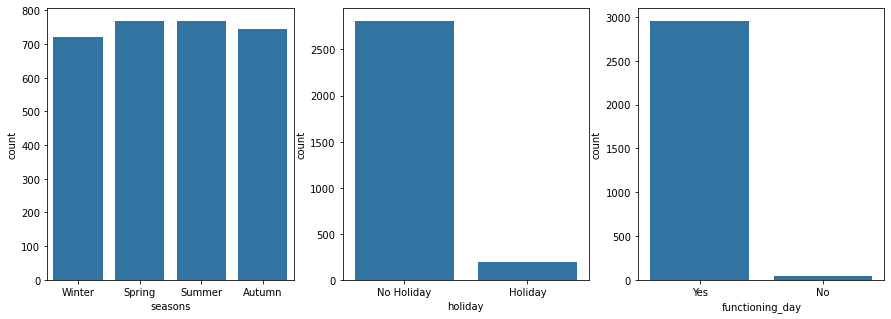

In [38]:
fig, ax = plt.subplots(ncols=3, figsize = [15,5])

default_color = sns.color_palette()[0]
sns.countplot(data = bikes, x = 'seasons', color = default_color, ax = ax[0])
sns.countplot(data = bikes, x = 'holiday', color = default_color, ax = ax[1])
sns.countplot(data = bikes, x = 'functioning_day', color = default_color, ax = ax[2])

plt.show()

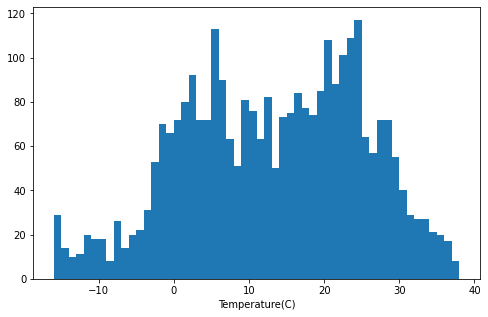

In [39]:
# Temperature(C)
binsize = 1
bins = np.arange(-16, bikes['temperature'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'temperature', bins = bins)
plt.xlabel('Temperature(C)')
plt.show()

as we could see from histogram above, tempreture follows multimodal distribution. the highest peak at 22C and lowest peak at about -5 C and in between we see multiple jumps.

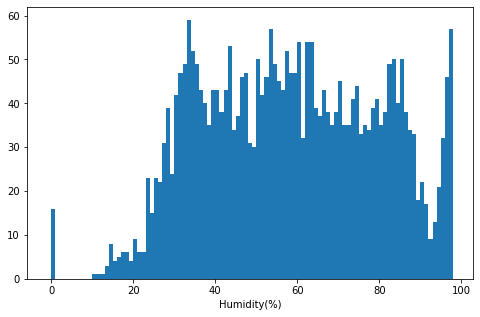

In [40]:
# Humidity(%)
binsize = 1
bins = np.arange(bikes['humidity'].min()-binsize, bikes['humidity'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'humidity', bins = bins)
plt.xlabel('Humidity(%)')
plt.show()

Humidity follows nearly the normal distribution model with outliers at (Humidity = 0%). in the right hand side of our histogram we could see a small left skewed distribution and (Humidity = 98%) has the most appearence in our data.    

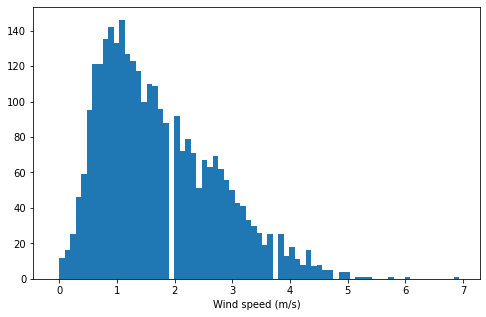

In [41]:
# Wind speed (m/s)
binsize = 0.095
bins = np.arange(bikes['wind_speed'].min()-binsize, bikes['wind_speed'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'wind_speed', bins = bins)
plt.xlabel('Wind speed (m/s)')
plt.show()

as we could see from distribution above, Wind speed has a right skewed distribution with peak at 1.20 m/s. There are some outliers beyond 5.0 m/s to be investigated.

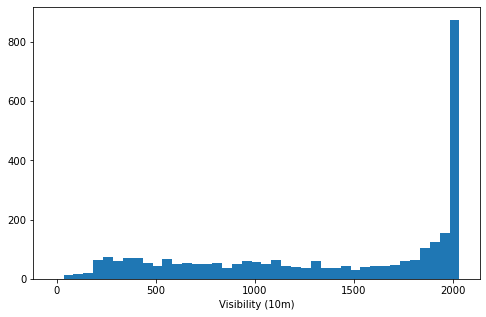

In [42]:
# Visibility (10m)
binsize = 50
bins = np.arange(bikes['visibility'].min()-binsize, bikes['visibility'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'visibility', bins = bins)
plt.xlabel('Visibility (10m)')
plt.show()

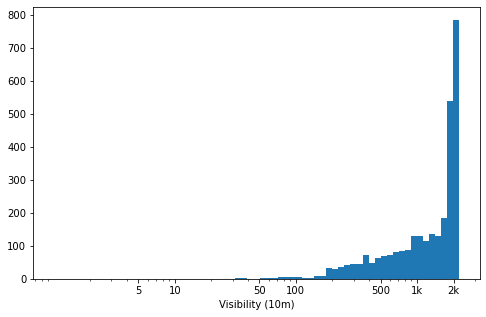

In [43]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(bikes['visibility'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'visibility', bins = bins)
plt.xscale('log')
plt.xticks([5,10,50, 100 ,500, 1e3, 2e3], [5,10,50, 100, 500, '1k', '2k'])
plt.xlabel('Visibility (10m)')
plt.show()

We could see that Visibility has a extreme left skewed even if using log scale. About one third of our data has a visibility = 2000. 

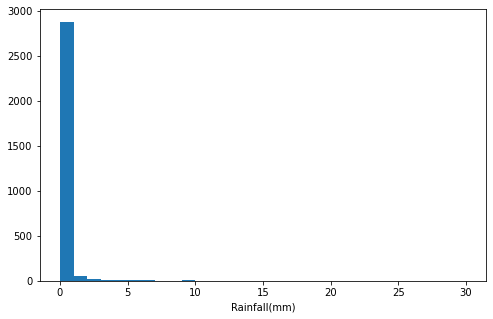

In [44]:
# Rainfall(mm)
binsize = 1
bins = np.arange(0, bikes['rainfall'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'rainfall', bins = bins)
plt.xlabel('Rainfall(mm)')
plt.show()

We have only 196 hours in our dataset with rain. 


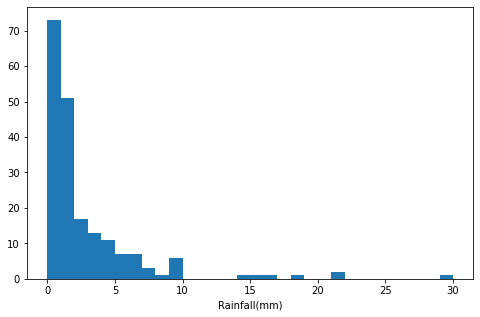

In [45]:
#display only hours with rainfall:
rainy = bikes[bikes['rainfall'] != 0]
print("We have only {} hours in our dataset with rain. ".format(rainy.shape[0]))
binsize = 1
bins = np.arange(0, rainy['rainfall'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rainy, x = 'rainfall', bins = bins)
plt.xlabel('Rainfall(mm)')
plt.show()


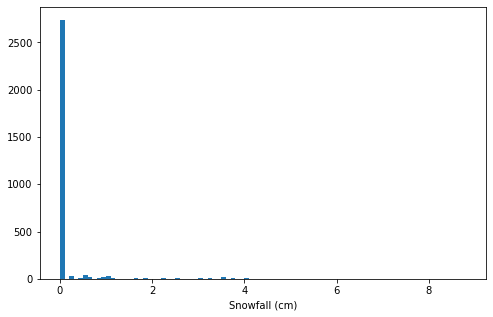

In [46]:
# Snowfall (cm)
binsize = 0.1
bins = np.arange(0, bikes['snowfall'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'snowfall', bins = bins)
plt.xlabel('Snowfall (cm)')
plt.show()

We have only 263 hours in our dataset with snowfall. 


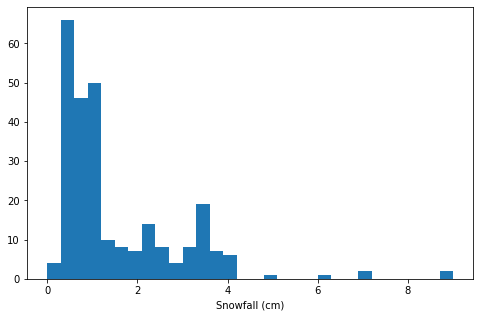

In [47]:
#display only hours with rainfall:
snow = bikes[bikes['snowfall'] != 0]
print("We have only {} hours in our dataset with snowfall. ".format(snow.shape[0]))
binsize = 0.30

bins = np.arange(0, snow['snowfall'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = snow, x = 'snowfall', bins = bins)
plt.xlabel('Snowfall (cm)')
plt.show()


we could clearly see that snowfall and rainfall has extremely right skewed distribution. we should check outliers above 15mm rainfall and above 3cm snowfall.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [48]:
numeric_vars = features[2:-3]

categoric_vars = ['seasons','holiday', 'functioning_day']
numeric_vars

['y',
 'hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

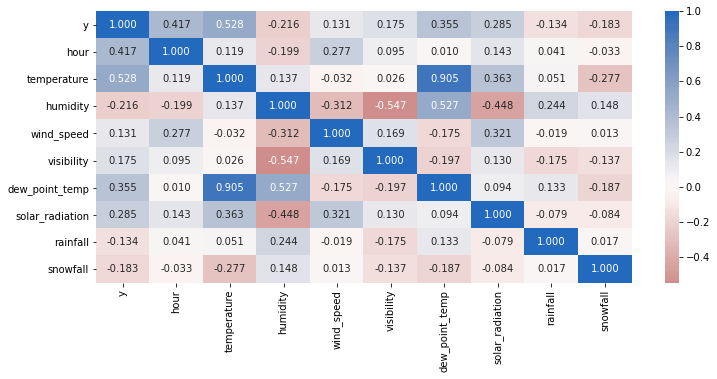

In [49]:
# correlation plot
plt.figure(figsize = [12, 5])
sns.heatmap(bikes[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

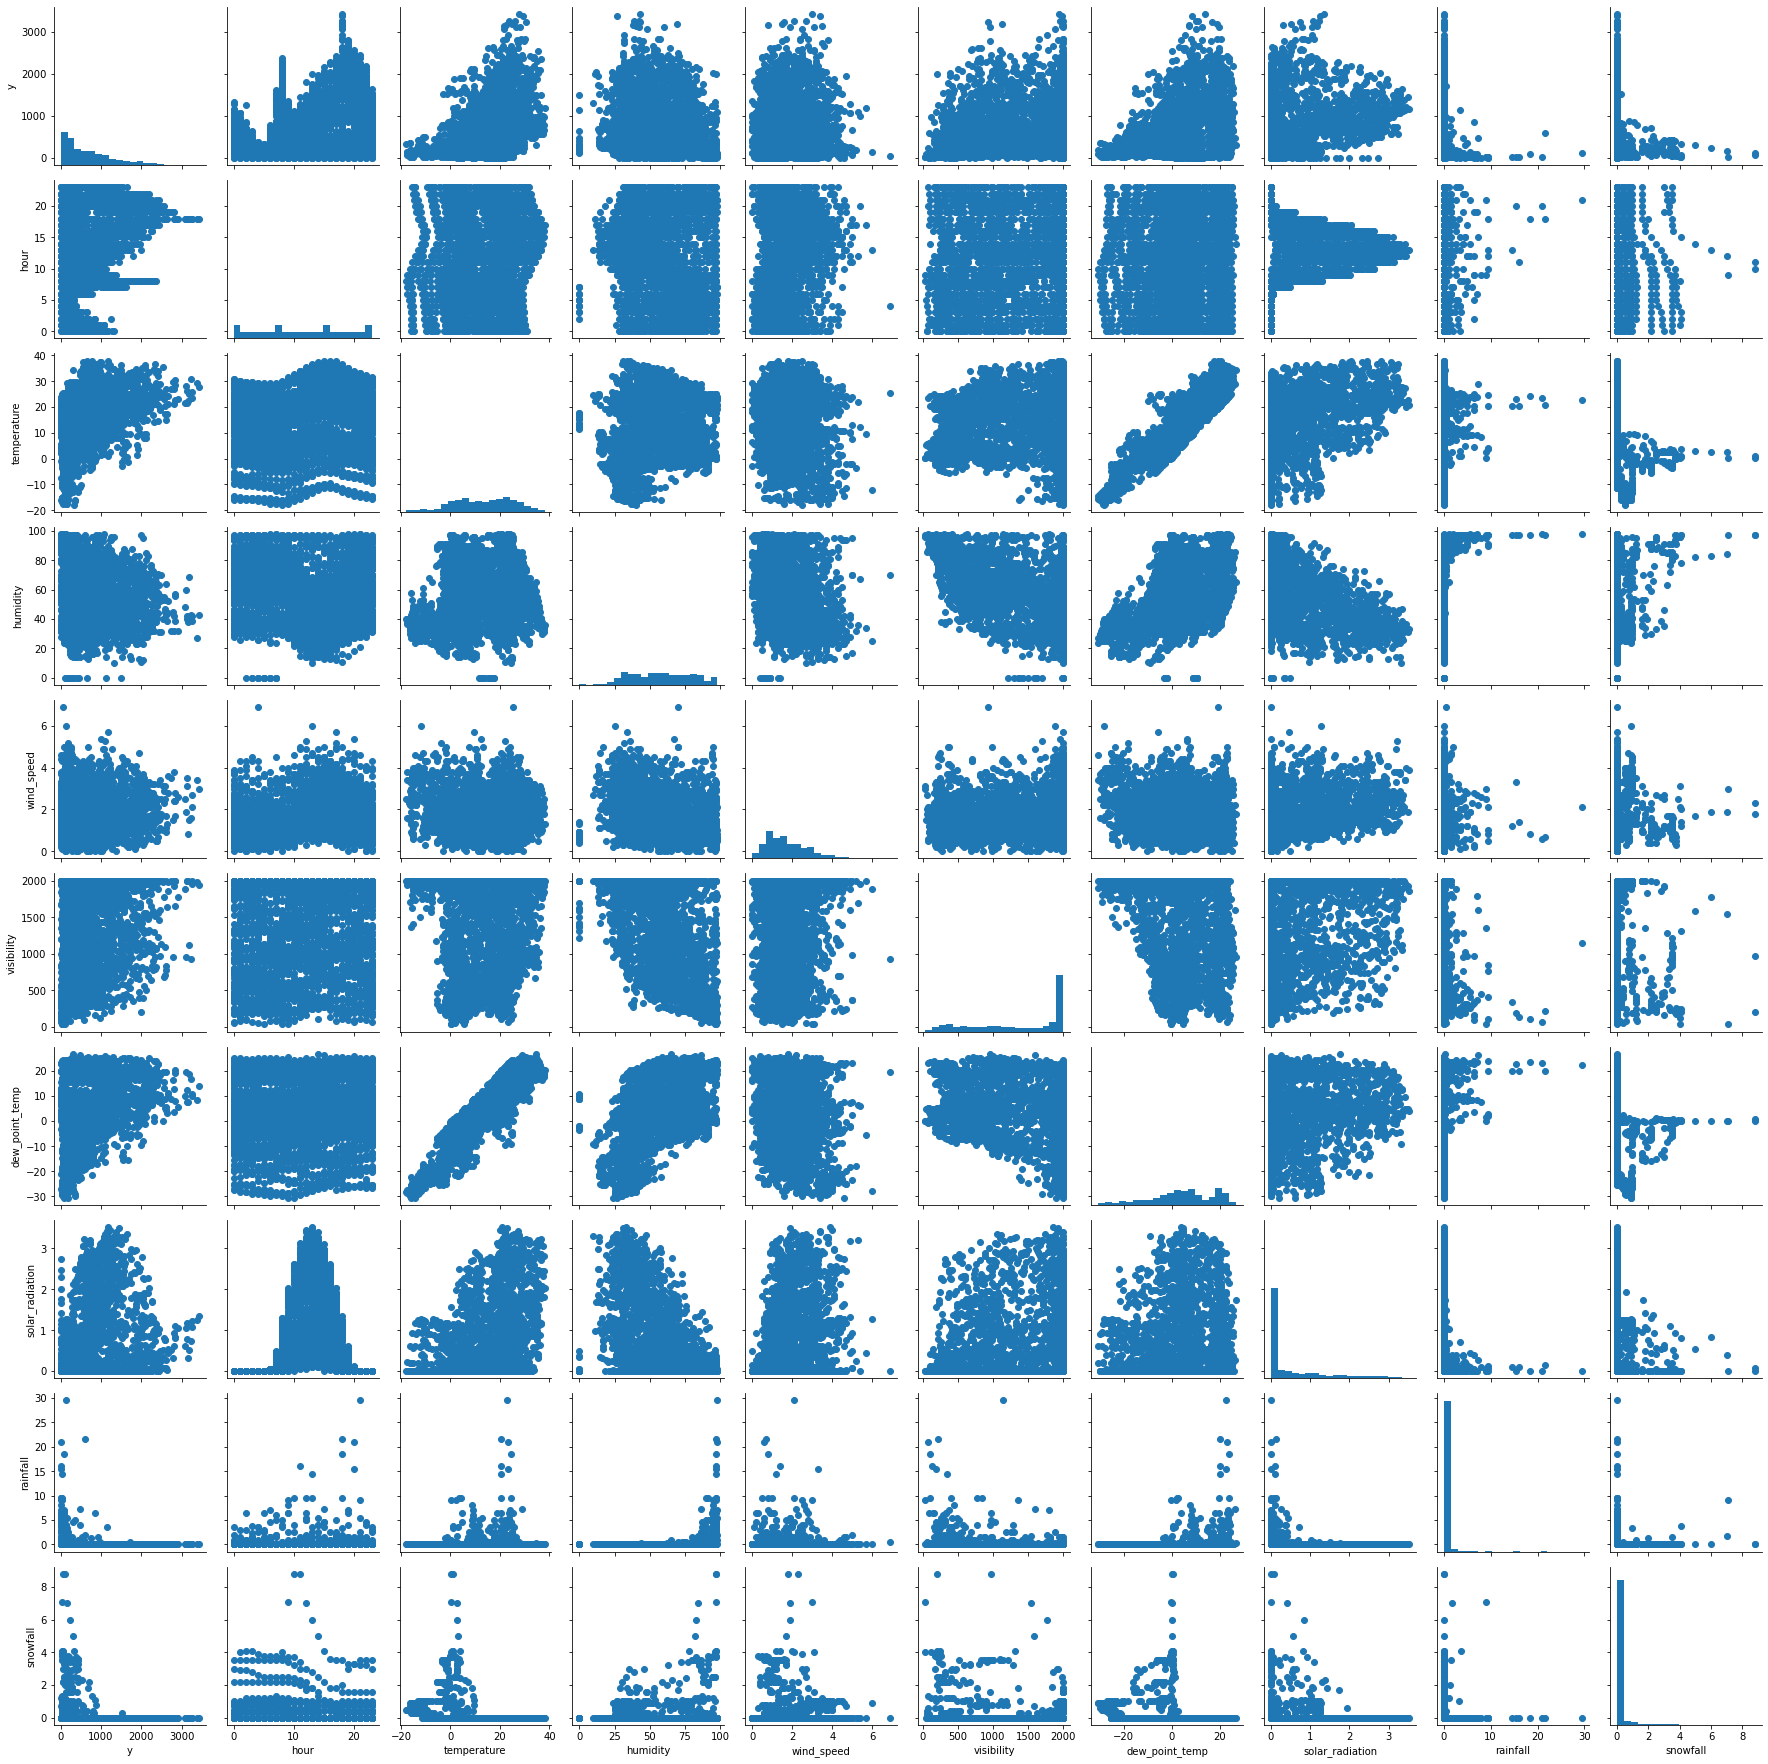

In [50]:
# pairplot

g = sns.PairGrid(data = bikes, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As we could see from charts above, there is a huge correlation as expexted between Temperature and Dew point temperature.
Also there is a negative correlation between humidity and visibility. 

If we look to the number of bikes rented we could see there is a correlation to hour and tempreture. this part needs more investigation with our categorical variables.

<Figure size 720x720 with 0 Axes>

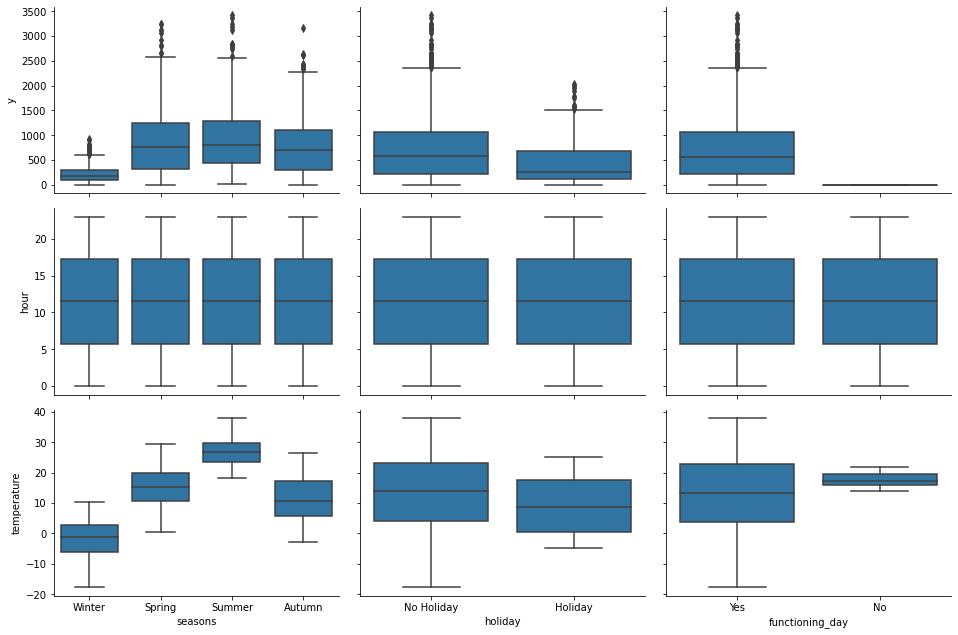

In [51]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = bikes, y_vars = ['y', 'hour', 'temperature'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

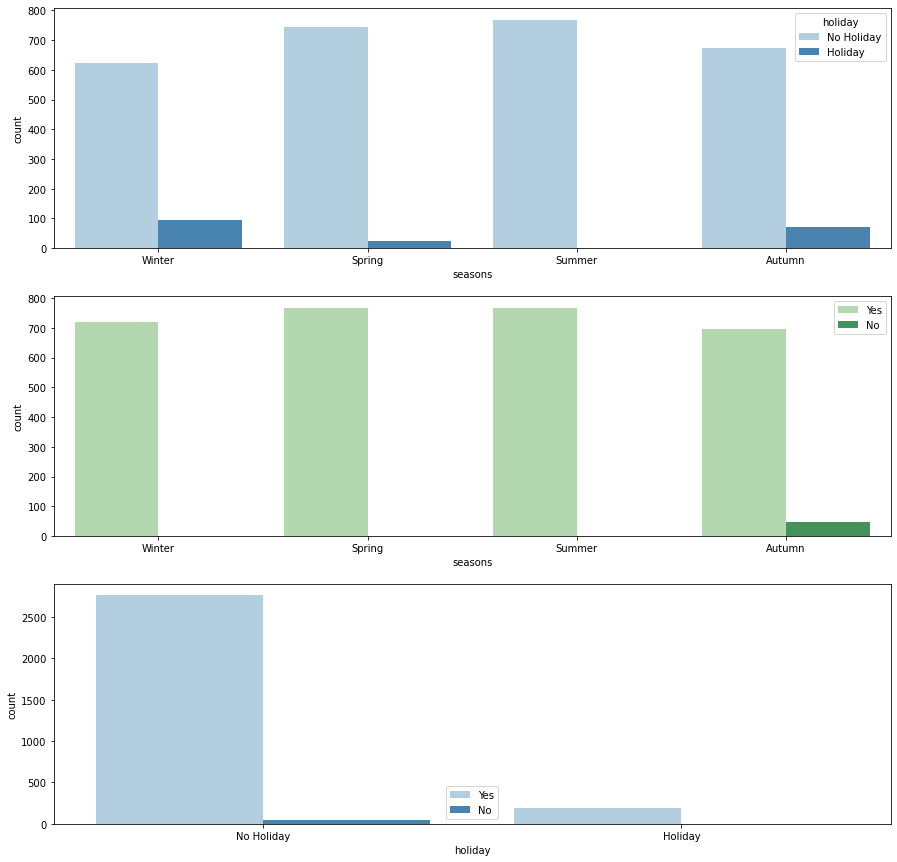

In [52]:
# plot categorical varaiables against each other:
plt.figure(figsize = [15, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sns.countplot(data = bikes, x = 'seasons', hue = 'holiday', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 3)
sns.countplot(data = bikes, x = 'holiday', hue = 'functioning_day', palette = 'Blues')
ax.legend() # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 2)
sns.countplot(data = bikes, x = 'seasons', hue = 'functioning_day', palette = 'Greens')
ax.legend() # re-arrange legend to remove overlapping

plt.show()

from charts above we could see that tend to use bikes at Summer and do not use it heavily at Winter. Autumn is less than Summer and more closely to Spring. so we need to see the relationship between number of bikes with day of year.

Now I will explore the relation between each variable and y in log scale:

In [53]:
bikes.columns

Index(['ID', 'date', 'y', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year_day',
       'weekday', 'month'],
      dtype='object')

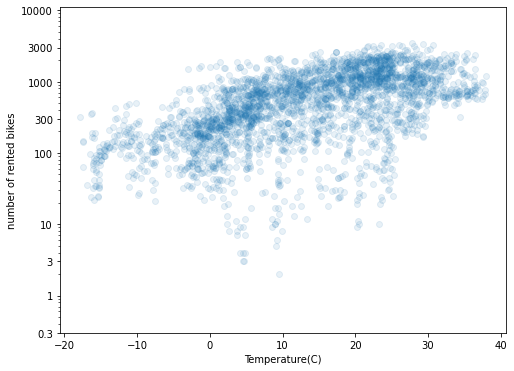

In [54]:
#draw the relation between Temperature and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'temperature', y = 'y', alpha = 1/10)
plt.xlabel('Temperature(C)')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

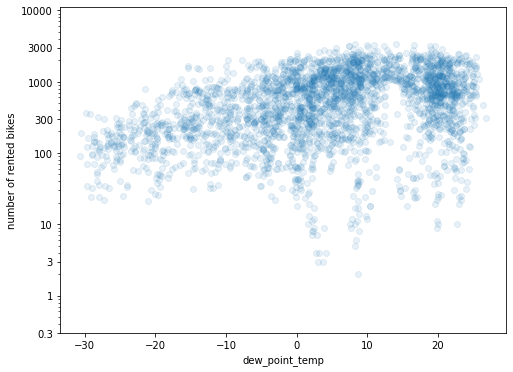

In [55]:
#draw the relation between dew_point_temp and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'dew_point_temp', y = 'y', alpha = 1/10)
plt.xlabel('dew_point_temp')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

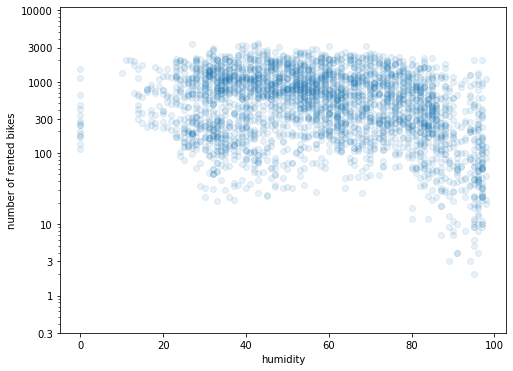

In [56]:
#draw the relation between humidity and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'humidity', y = 'y', alpha = 1/10)
plt.xlabel('humidity')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

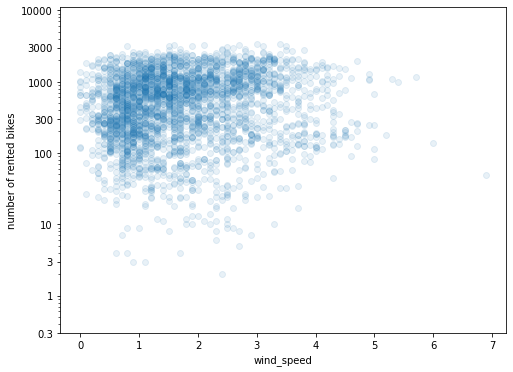

In [57]:
#draw the relation between wind_speed and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'wind_speed', y = 'y', alpha = 1/10)
plt.xlabel('wind_speed')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

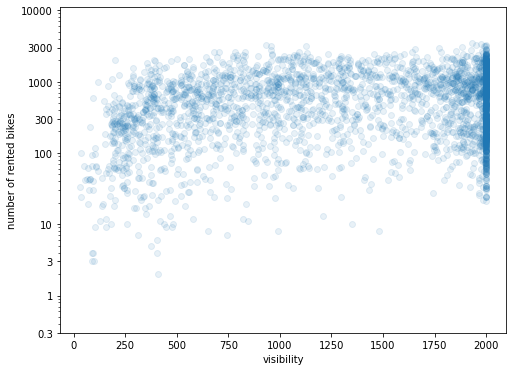

In [58]:

#draw the relation between visibility and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'visibility', y = 'y', alpha = 1/10)
plt.xlabel('visibility')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

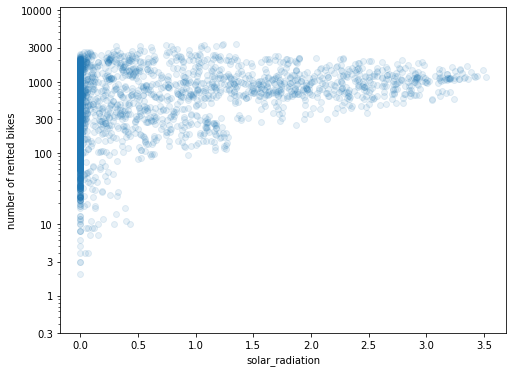

In [59]:

#draw the relation between solar_radiation and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'solar_radiation', y = 'y', alpha = 1/10)
plt.xlabel('solar_radiation')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

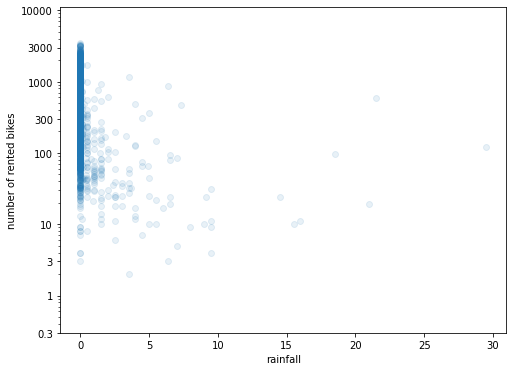

In [60]:
#draw the relation between rainfall and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'rainfall', y = 'y', alpha = 1/10)
plt.xlabel('rainfall')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

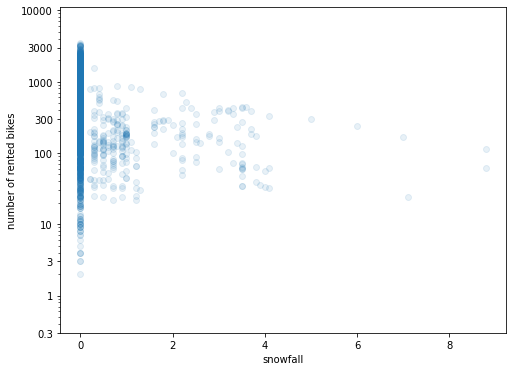

In [61]:
#draw the relation between snowfall and number of bikes in log scale:
plt.figure(figsize = [8, 6])
plt.scatter(data = bikes, x = 'snowfall', y = 'y', alpha = 1/10)
plt.xlabel('snowfall')
plt.yscale('log')
plt.yticks([0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000], [0.3, 1, 3, 10, 100, 300, 1000, 3000, 10000])
plt.ylabel('number of rented bikes')
plt.show()

<AxesSubplot:xlabel='hour', ylabel='y'>

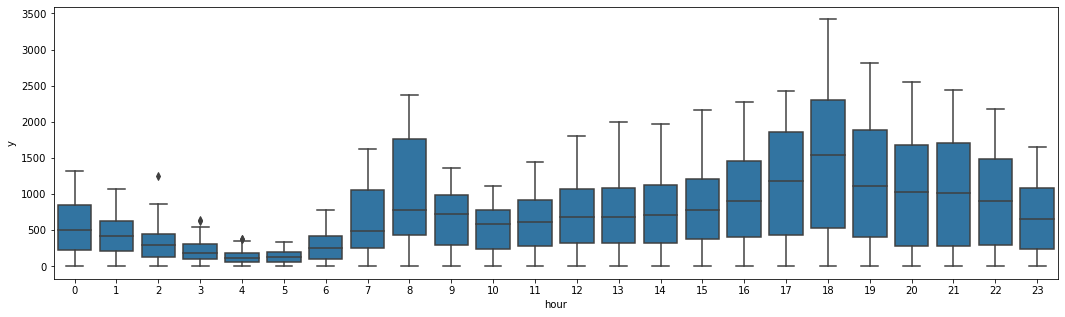

In [62]:
#see the distribution for every hour in the day
plt.figure(figsize=(18,5))
sns.boxplot(data= bikes , x= "hour", y="y", color = default_color)

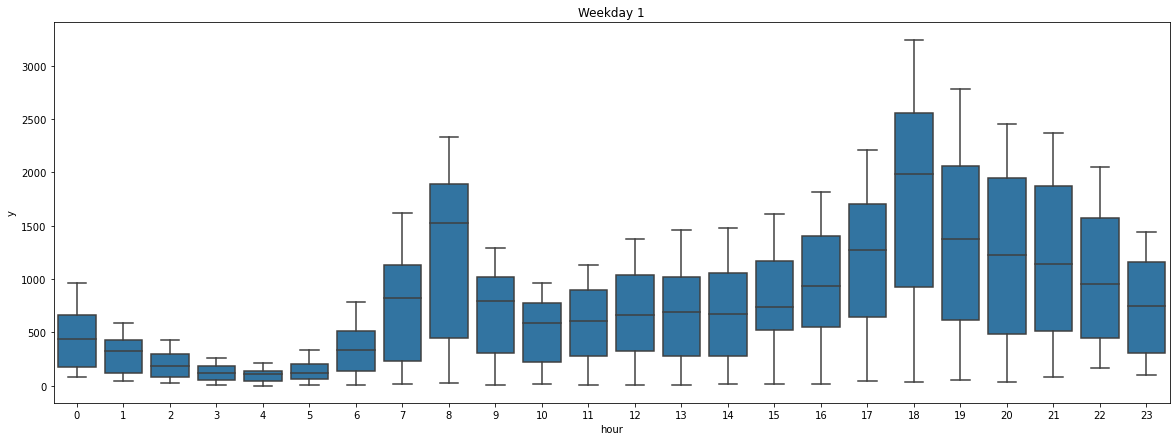

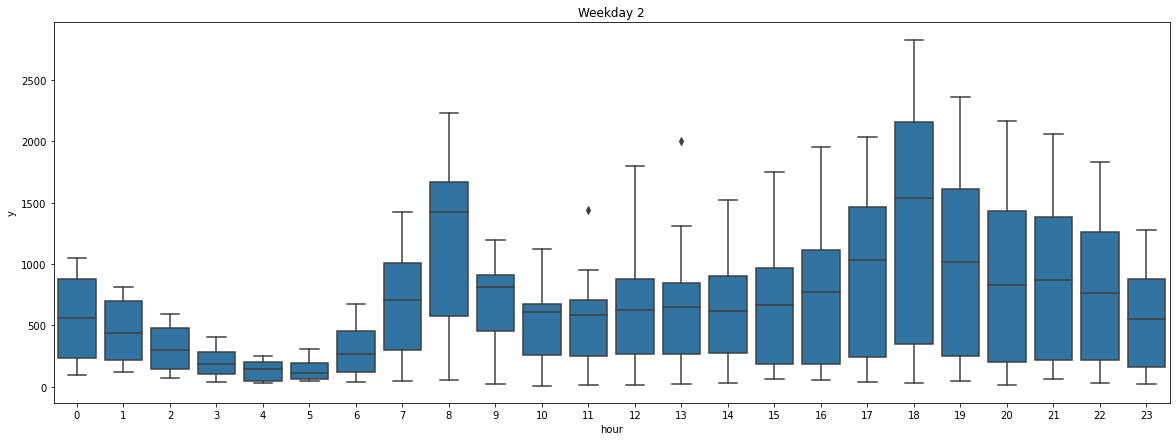

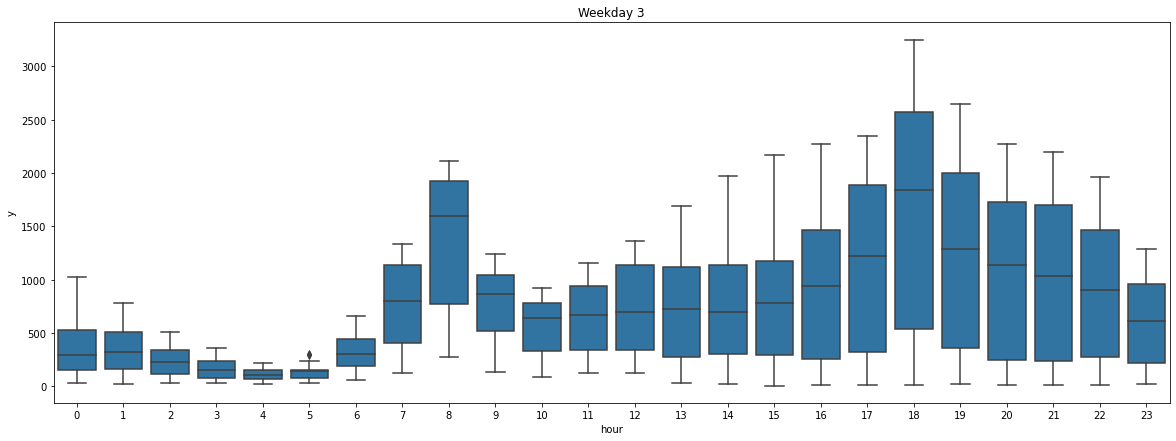

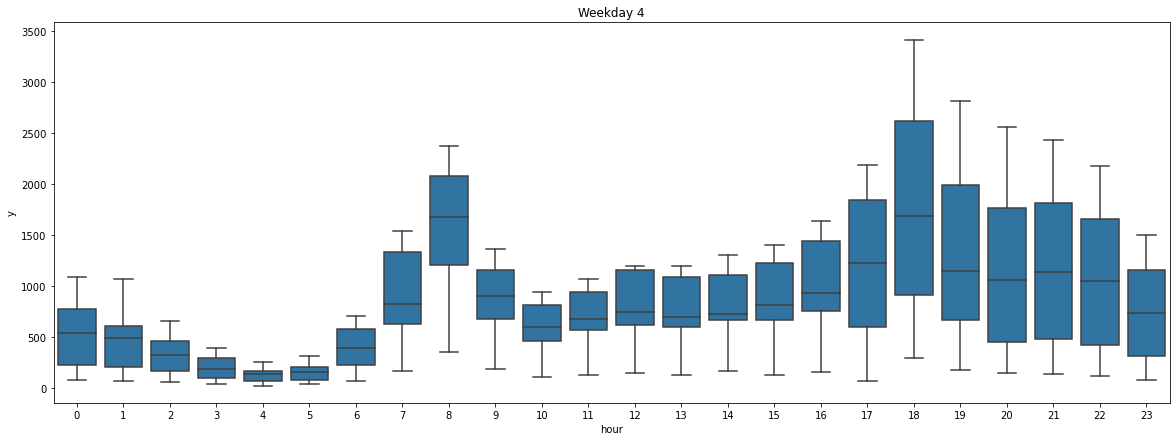

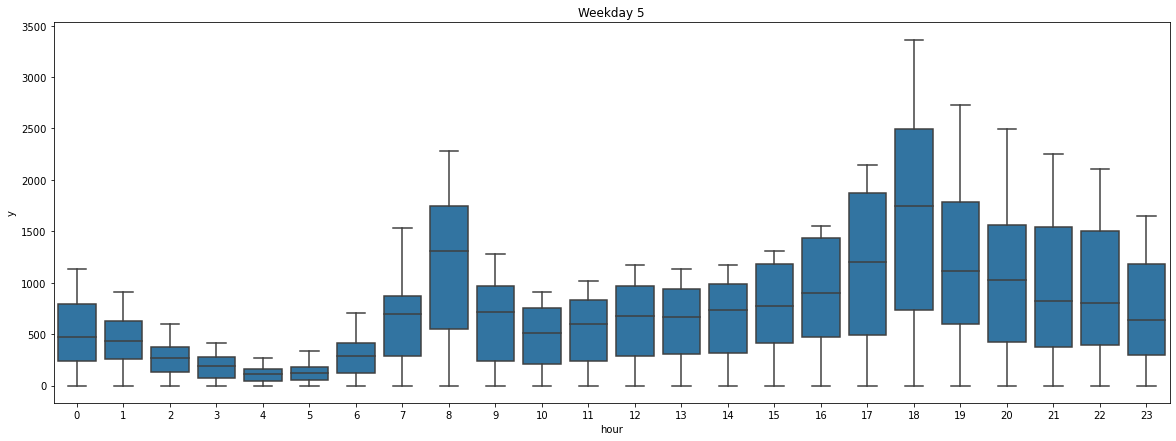

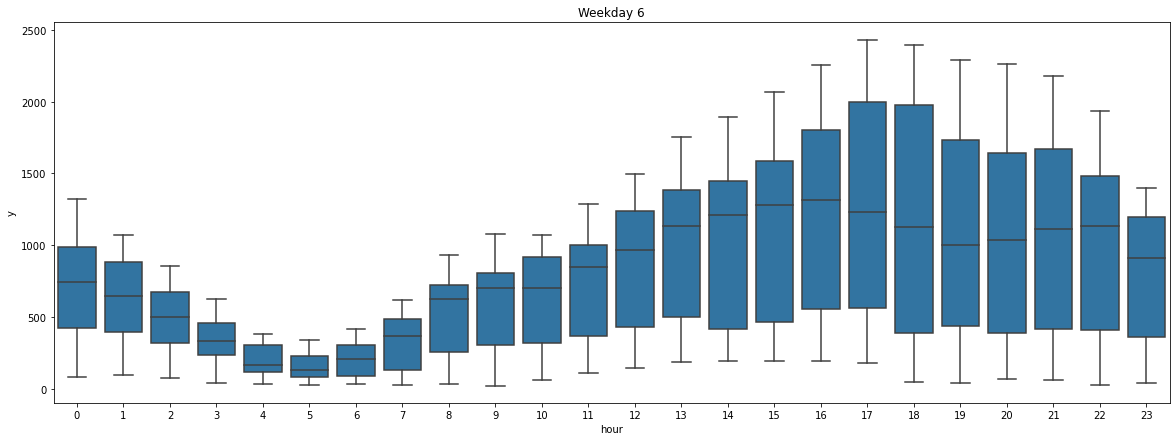

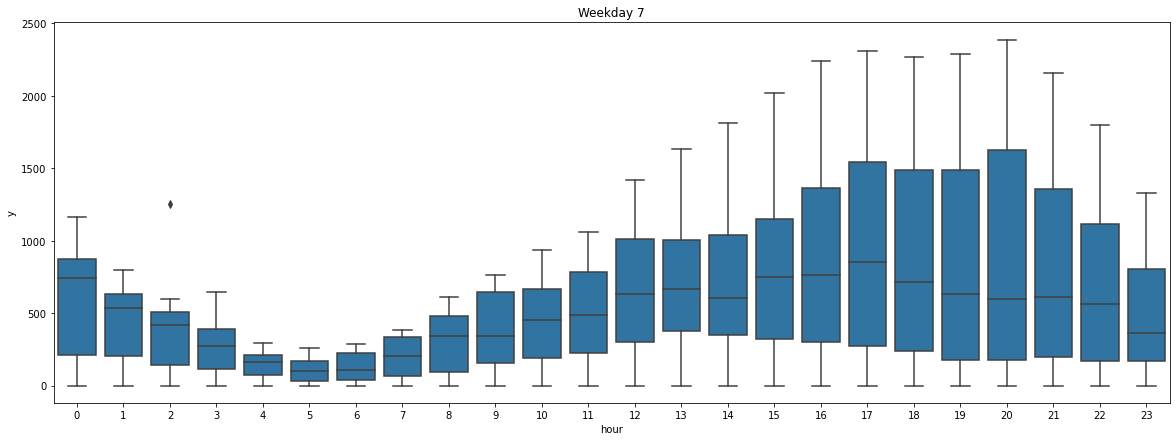

In [63]:
##see the distribution for every hour in the day for every weekday
for weekday in range(7):   
    weekday_df = bikes.query('weekday=={}'.format(weekday))
    plt.figure(figsize=(20,7))
    sns.boxplot(data= weekday_df , x= "hour", y="y", color = default_color)
    plt.title("Weekday {}".format(weekday + 1))


I could see a pattern for workdays (Mondays to Fridays). there are a peak at 8:00 am when people going to work and at 18:00 pm when people return from work. there is also interesting thing that more people use bikes at returning from work hours than going to work hours. that may happens because people at morning may use the bikes only for going to work but at 18:00 there are people who rent a bike for another reason for going back home from work. 

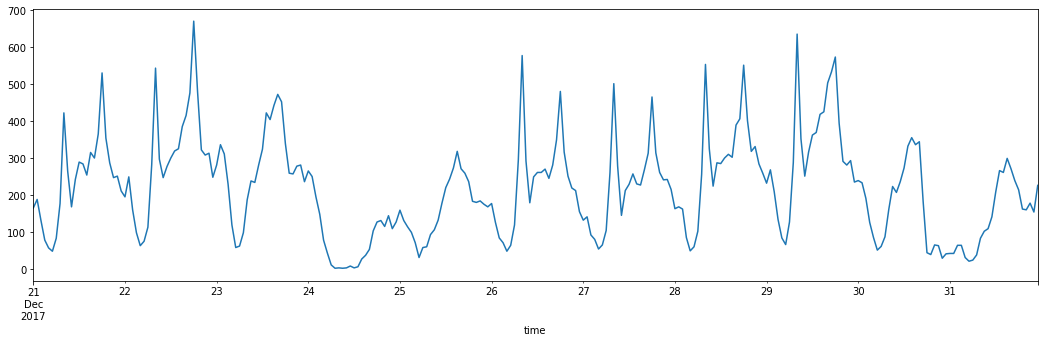

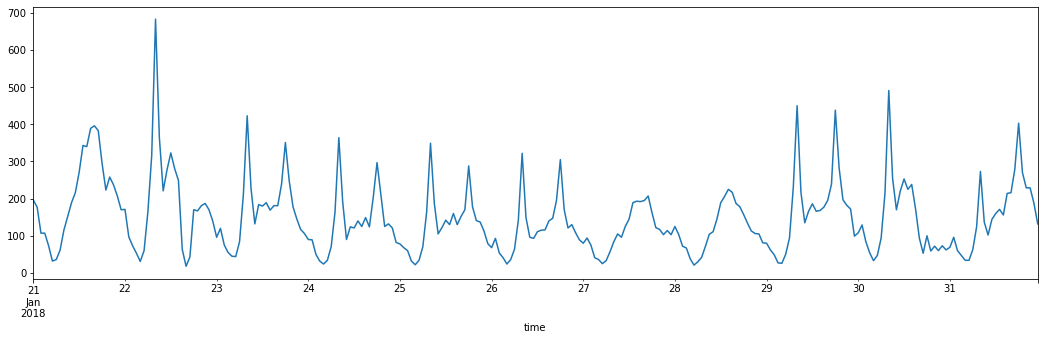

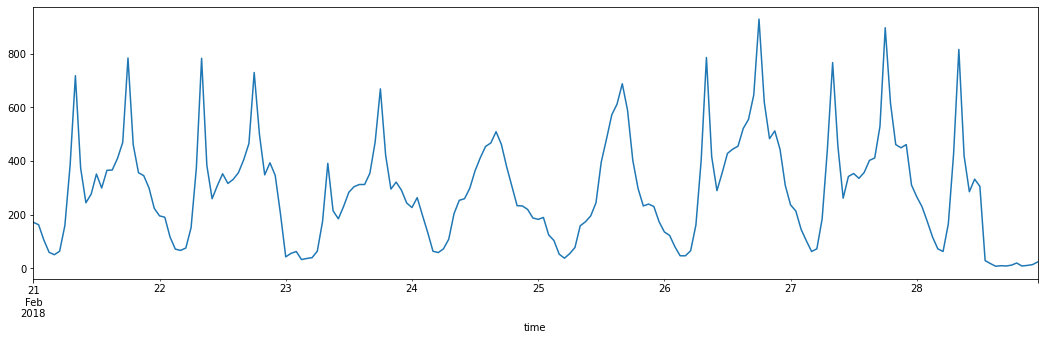

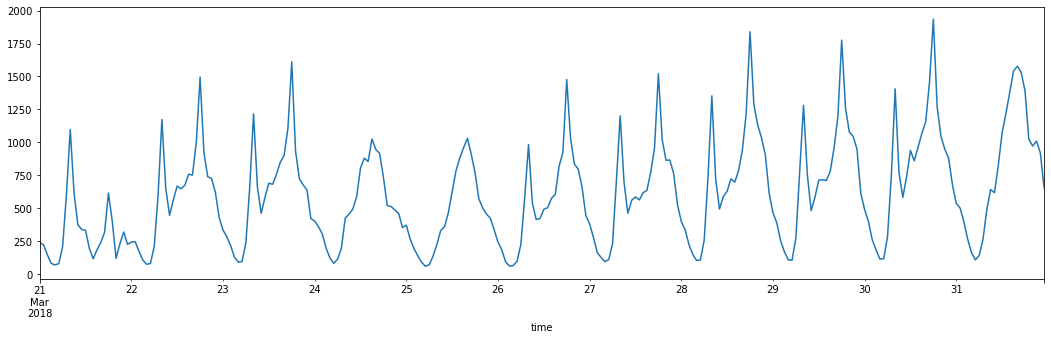

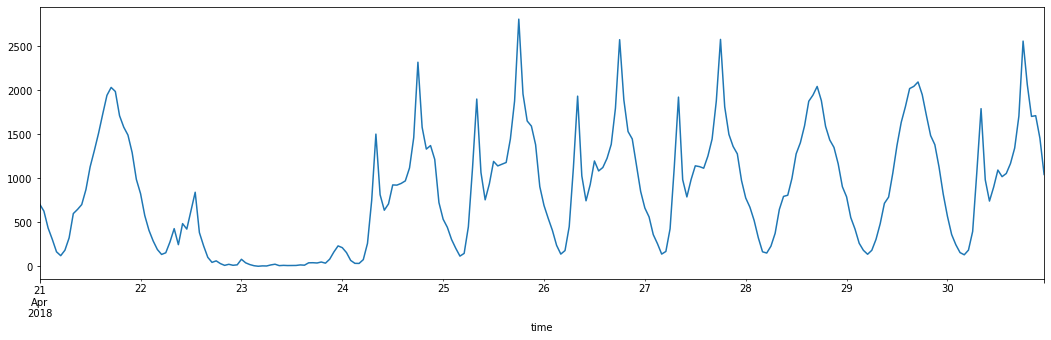

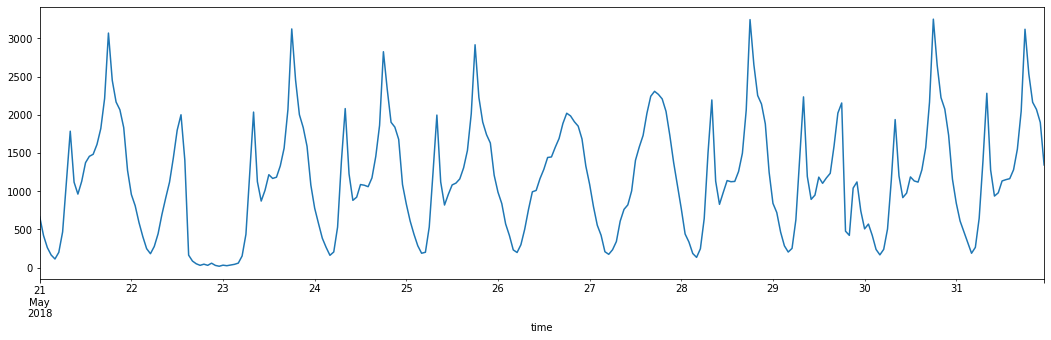

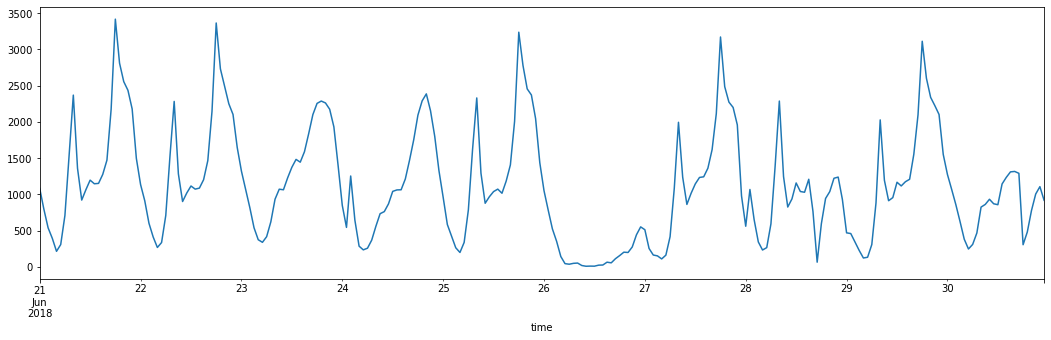

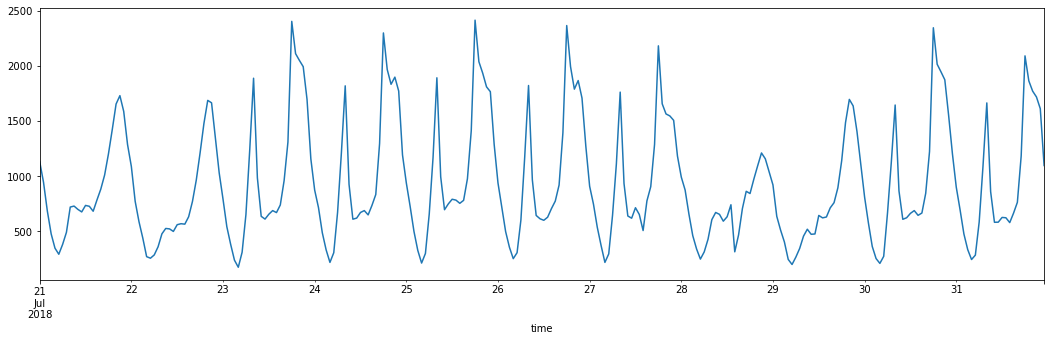

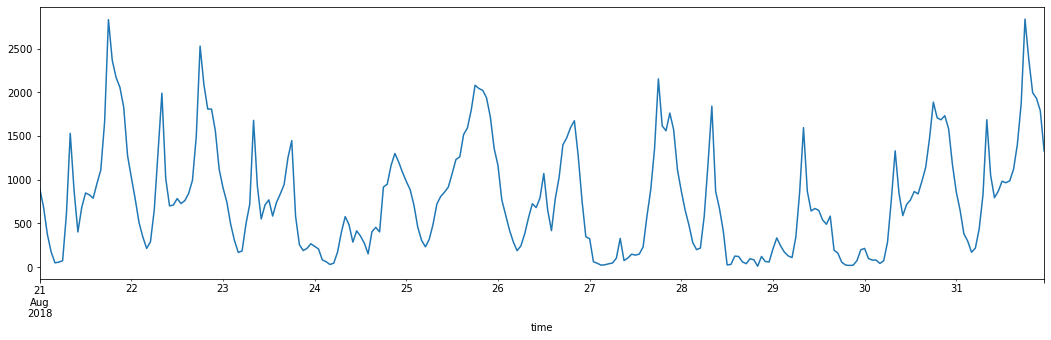

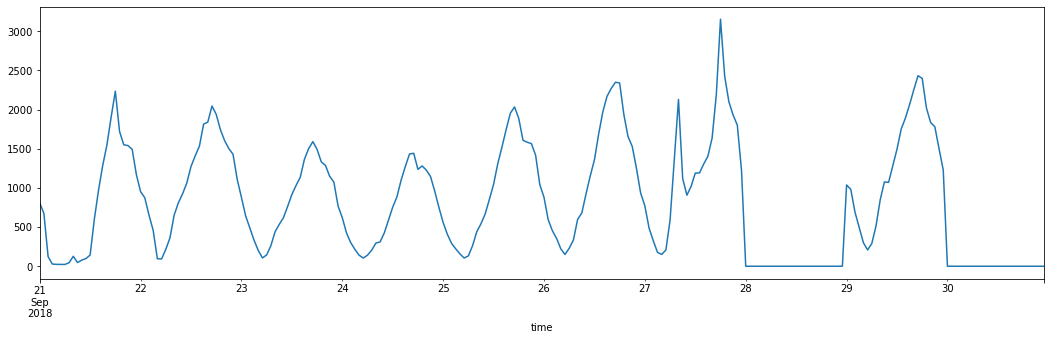

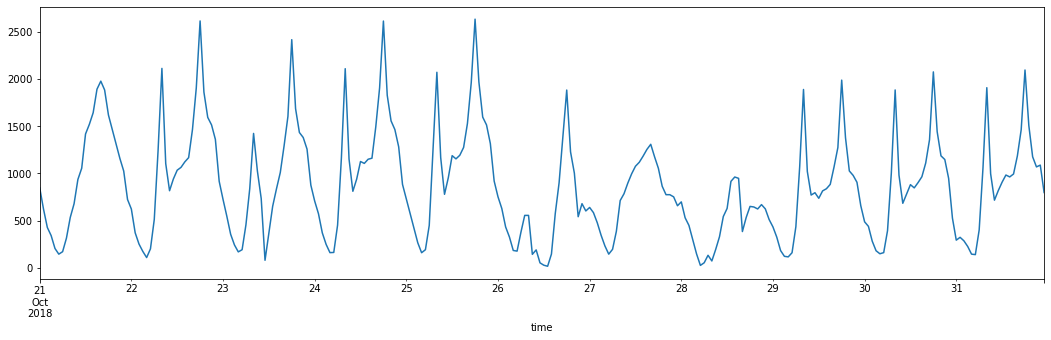

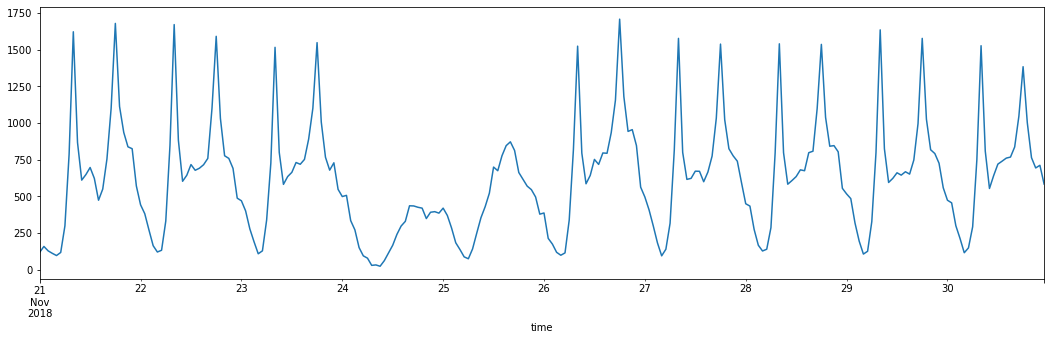

In [64]:
#timeseries per hour for each month:
ax = plt.figure(figsize=(18,5))
bikes['y'].loc[bikes.index.month==(12)].plot()
for month in range(11):
    plt.figure(figsize=(18,5))
    bikes['y'].loc[bikes.index.month==(month+1)].plot()
    

# Feature Engineering:

### #1- make a new column for workday(binary):

In [65]:
bikes['work_day'] = np.where((bikes['weekday'] == 5) | (bikes['weekday'] == 6) , False, True)
bikes.loc[bikes.holiday == 'Holiday', 'work_day'] = False
bikes[bikes['holiday']=='Holiday'].head(2)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year_day,weekday,month,work_day
time,,,,,,,,,,,,,,,,,,,
2017-12-22 00:00:00,5784,2017-12-22,196,0,-1.7,79,0.5,794,-4.8,0.0,0.0,0.8,Winter,Holiday,Yes,356,4,12,False
2017-12-22 01:00:00,5785,2017-12-22,250,1,-1.6,79,0.6,784,-4.7,0.0,0.0,0.8,Winter,Holiday,Yes,356,4,12,False


### #2- make a new column for heat index:

In [66]:
#Heat index 
bikes['temp_F'] = 1.8*bikes['temperature'] + 32
T = bikes['temp_F']
RH = bikes['humidity']
bikes['heat_index'] = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
bikes[bikes['holiday']=='Holiday'].head(2)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,...,snowfall,seasons,holiday,functioning_day,year_day,weekday,month,work_day,temp_F,heat_index
time,,,,,,,,,,,,,,,,,,,,,
2017-12-22 00:00:00,5784,2017-12-22,196,0,-1.7,79,0.5,794,-4.8,0.0,...,0.8,Winter,Holiday,Yes,356,4,12,False,28.94,181.481359
2017-12-22 01:00:00,5785,2017-12-22,250,1,-1.6,79,0.6,784,-4.7,0.0,...,0.8,Winter,Holiday,Yes,356,4,12,False,29.12,180.425409


### #3- Moving averges:

In [67]:
a=3   #best 3
b=5   #best 5
c=6
bikes['rainfall_MA'] = bikes['rainfall'].rolling(window=a, min_periods=1).mean()
bikes['snowfall_MA'] = bikes['snowfall'].rolling(window=b, min_periods=1).mean()
bikes['temperature_MA'] = bikes['temperature'].rolling(window=c, min_periods=1).mean()
bikes.head(2)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,...,functioning_day,year_day,weekday,month,work_day,temp_F,heat_index,rainfall_MA,snowfall_MA,temperature_MA
time,,,,,,,,,,,,,,,,,,,,,
2017-12-21 00:00:00,5760,2017-12-21,166,0,-1.3,90,2.0,259,-2.7,0.0,...,Yes,355,3,12,True,29.66,169.289307,0.0,2.2,-1.30
2017-12-21 01:00:00,5761,2017-12-21,189,1,-1.8,90,1.6,263,-3.2,0.0,...,Yes,355,3,12,True,28.76,174.825926,0.0,2.2,-1.55


### #4- cycles for timeseries components:

In [68]:
timestamp_s = bikes.index.map(pd.Timestamp.timestamp)


day = 24*60*60
week = 7 * day
year = (365.2425)*day

bikes['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
bikes['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
bikes['week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
bikes['week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
bikes['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
bikes['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

bikes.head(2)

,ID,date,y,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,...,heat_index,rainfall_MA,snowfall_MA,temperature_MA,Day sin,Day cos,week sin,week cos,Year sin,Year cos
time,,,,,,,,,,,,,,,,,,,,,
2017-12-21 00:00:00,5760,2017-12-21,166,0,-1.3,90,2.0,259,-2.7,0.0,...,169.289307,0.0,2.2,-1.30,-6.018026e-12,1.000000,-8.015114e-14,1.000000,-0.182017,0.983295
2017-12-21 01:00:00,5761,2017-12-21,189,1,-1.8,90,1.6,263,-3.2,0.0,...,174.825926,0.0,2.2,-1.55,2.588190e-01,0.965926,3.739119e-02,0.999301,-0.181312,0.983426


# Data cleaning for modeling:

## #1-encoding for categorical variables:

In [69]:
bikes["functioning_day"] = bikes["functioning_day"].replace({'Yes': 1, 'No': 0})
bikes["holiday"] = bikes["holiday"].replace({'No Holiday': 1 , 'Holiday': 0})
bikes["seasons"] = bikes["seasons"].replace({'Winter': 1, 'Spring': 2,"Summer": 3, "Autumn": 4})

bikes[categoric_vars].head(2)

,seasons,holiday,functioning_day
time,,,
2017-12-21 00:00:00,1,1,1
2017-12-21 01:00:00,1,1,1


## 2-Removing outliers:

In [70]:
#outliers for y : 
print(bikes.shape)
bikes = bikes.drop(bikes[bikes['y']<=2].index)
bikes = bikes.drop(bikes[bikes['y']> 2500].index)
print(bikes.shape)

(3000, 30)
(2920, 30)


In [71]:
#final 
bikes.head(1).T

time,2017-12-21
ID,5760
date,2017-12-21 00:00:00
y,166
hour,0
temperature,-1.3
humidity,90
wind_speed,2.0
visibility,259
dew_point_temp,-2.7
solar_radiation,0.0


## Matching test data features with our training data features:


In [72]:
df_test = pd.read_csv('test.csv', parse_dates=[1], dayfirst=True)
df_test.head()

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,5761,2017-12-21,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,5762,2017-12-21,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,5763,2017-12-21,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,5764,2017-12-21,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


In [73]:
df_test['year'] = pd.to_datetime(df_test.Date).dt.year
df_test['month'] = pd.to_datetime(df_test.Date).dt.month
df_test['day'] = pd.to_datetime(df_test.Date).dt.day
df_test['time'] = pd.to_datetime(df_test[['year', 'month', 'day', 'Hour']])
df_test = df_test.set_index('time')
df_test.drop(['year', 'month', 'day'], axis=1, inplace=True)

df_test.head(2)

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
time,,,,,,,,,,,,,,
2017-12-21 00:00:00,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
2017-12-21 01:00:00,5761,2017-12-21,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes


In [74]:
#renaming coulumns:
features = ['ID','date' , 'hour', 'temperature', 'humidity',
            'wind_speed', 'visibility', 'dew_point_temp',
            'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day']
df_test.columns = features
df_test.head(1)

,ID,date,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
time,,,,,,,,,,,,,,
2017-12-21,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes


In [75]:
# order seasons column:
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ["Winter", "Spring", "Summer", "Autumn" ])
df_test['seasons'] = df_test['seasons'].astype(ordered)

In [76]:
#Extract day of year:
df_test['year_day'] = pd.to_datetime(df_test.date).dt.dayofyear
df_test['weekday'] = pd.to_datetime(df_test.date).dt.weekday
df_test['month'] = pd.to_datetime(df_test.date).dt.month

In [77]:
df_test.head(1)

,ID,date,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year_day,weekday,month
time,,,,,,,,,,,,,,,,,
2017-12-21,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes,355,3,12
